In [1]:
%matplotlib inline

loading modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

I had the database downloaded locally but it can be found https://www.kaggle.com/usgs/earthquake-database 

In [3]:
df = pd.read_csv("/home/laurence/Downloads/database.csv")

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


turning categorical variable to a boolean as detailed in the essay

In [5]:
df['encodedType']=df['Type']

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,encodedType
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Earthquake
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Earthquake
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Earthquake
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Earthquake
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Earthquake


I based my code on https://pbpython.com/categorical-encoding.html I need to use the categorical field and make a boolean from it. 

In [7]:
Boolean = {"encodedType":     {"Earthquake": 0, "Rock Burst": 0, "Nuclear Explosion": 1, "Explosion":1 }}

In [8]:
df = df.replace(Boolean)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,encodedType
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,0
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,0
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,0
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,0
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,0


code based on https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib and https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/#:~:text=A%203D%20Scatter%20Plot%20is,to%20enable%20three%20dimensional%20plotting as listed in first coursework. Mapping the three selcted factor and the fourth

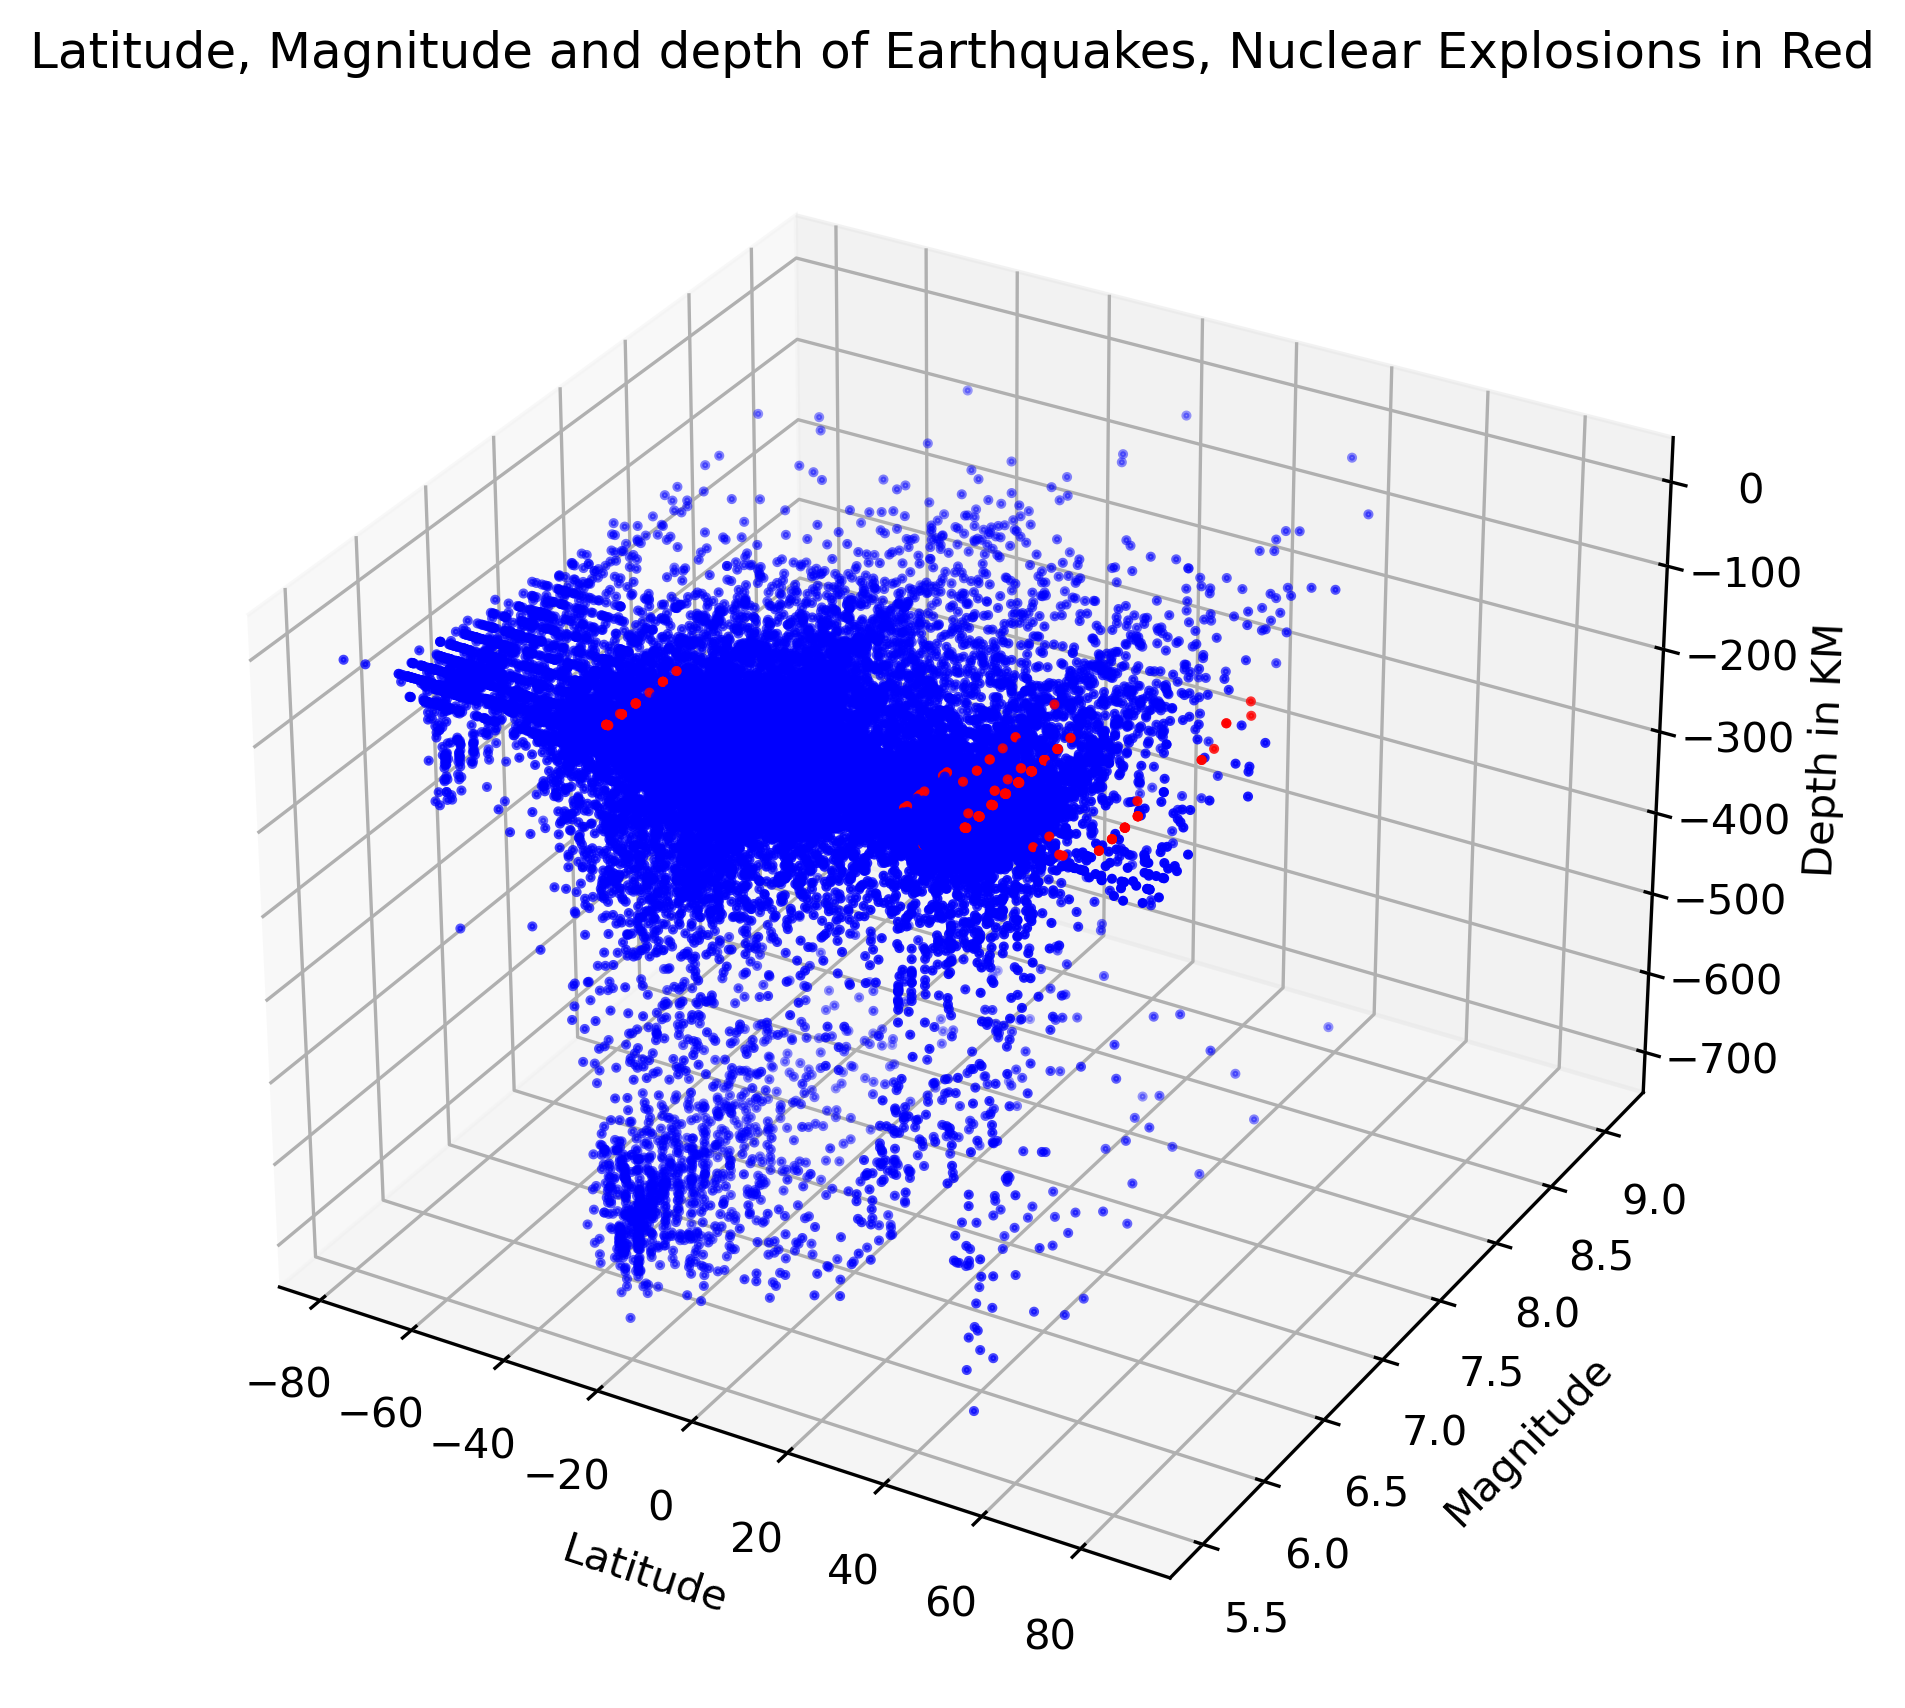

In [9]:
fig = plt.figure(figsize = (10, 7))
ax5 = plt.axes(projection="3d")
colors = {1:'red', 0:'blue'}
ax5.set_title('Latitude, Magnitude and depth of Earthquakes, Nuclear Explosions in Red')
ax5.set_ylabel("Magnitude")
ax5.set_xlabel("Latitude")
ax5.set_zlabel("Depth in KM")
negativeDepth=df.Depth*-1 #making deeper earthquakes lower so the human events are easier to see
              
ax5.scatter3D(df.Latitude, df.Magnitude, negativeDepth, c=df.encodedType.apply(lambda x: colors[x]),s=2)


plt.show()

array requided for input

In [10]:
x= df[["Latitude", "Magnitude", "Depth"]].to_numpy()



This is using the Gaël Varoquaux code and https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/ as a base for my PCA

In [11]:
X_reduced = PCA(n_components=2).fit_transform(x)

Text(0, 0.5, 'PC2')

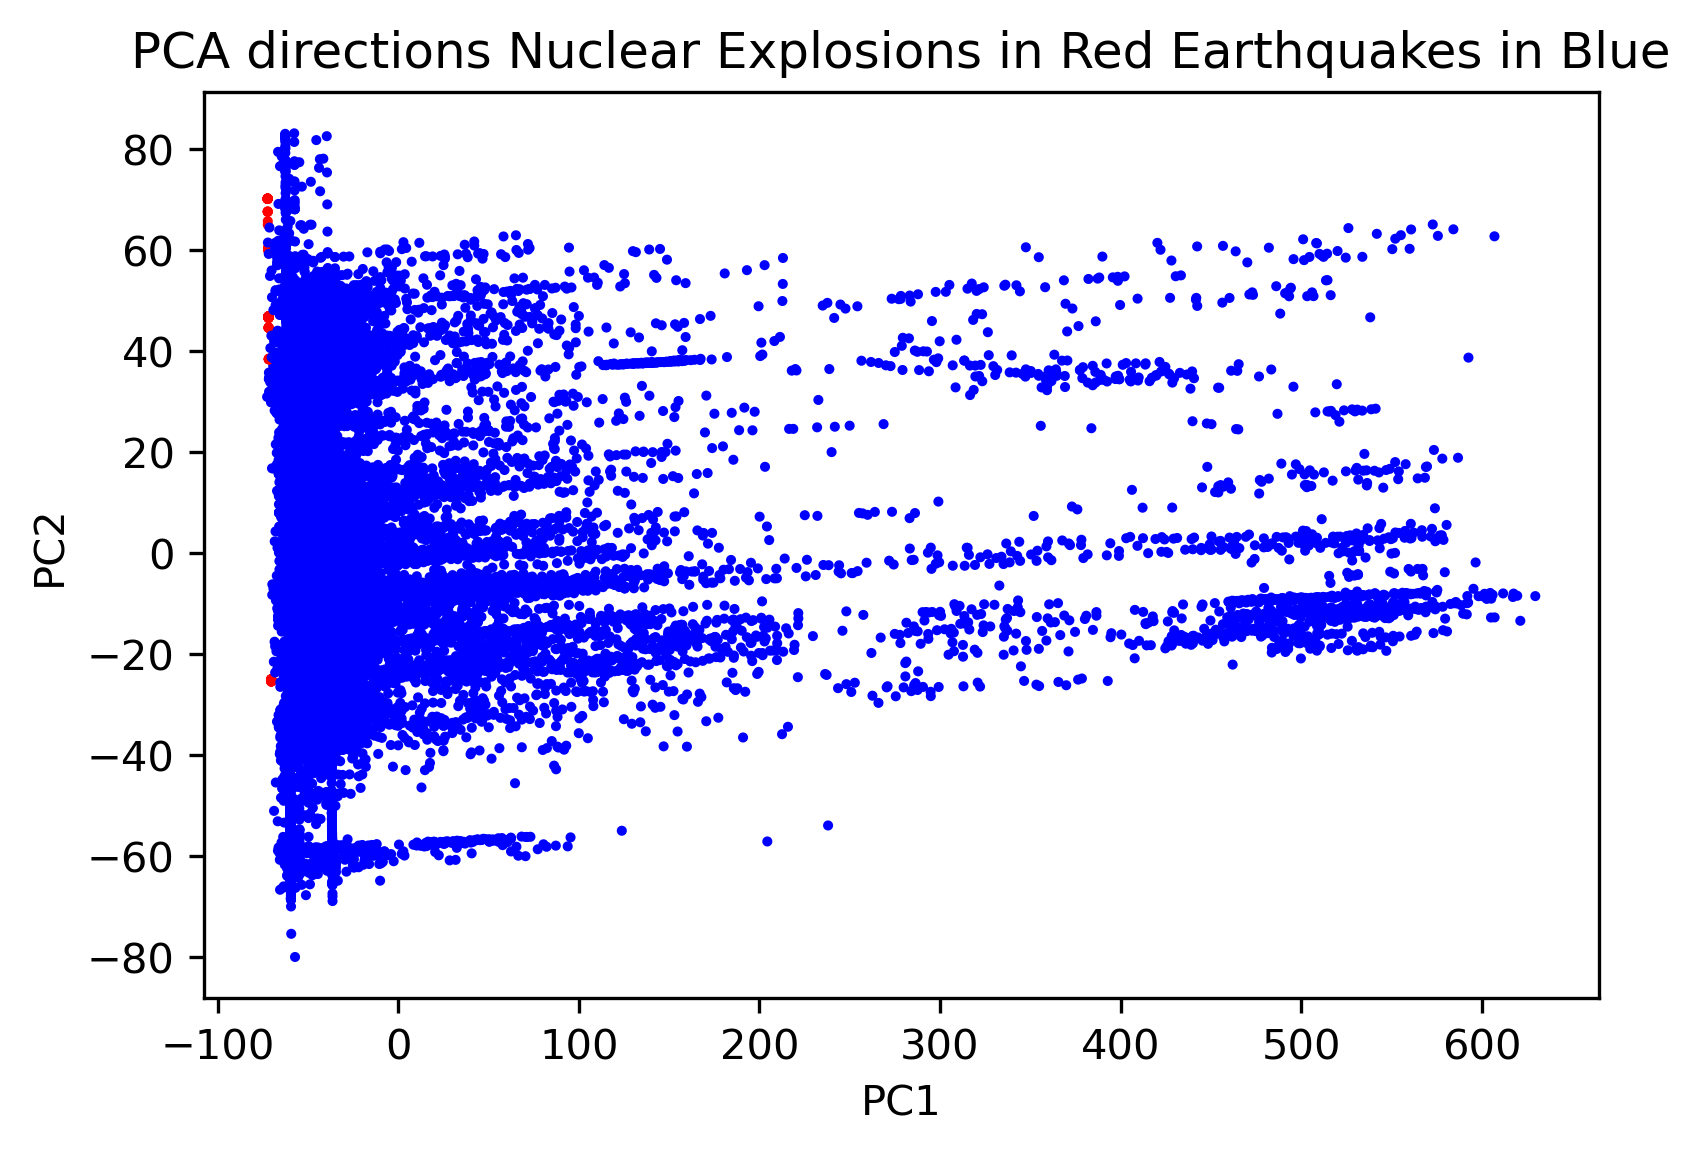

In [12]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c=df.encodedType.apply(lambda x: colors[x]),s=2)
plt.title("PCA directions Nuclear Explosions in Red Earthquakes in Blue")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [13]:
X_reduced = PCA(n_components=3).fit_transform(x)

Text(0.5, 0, 'PC1')

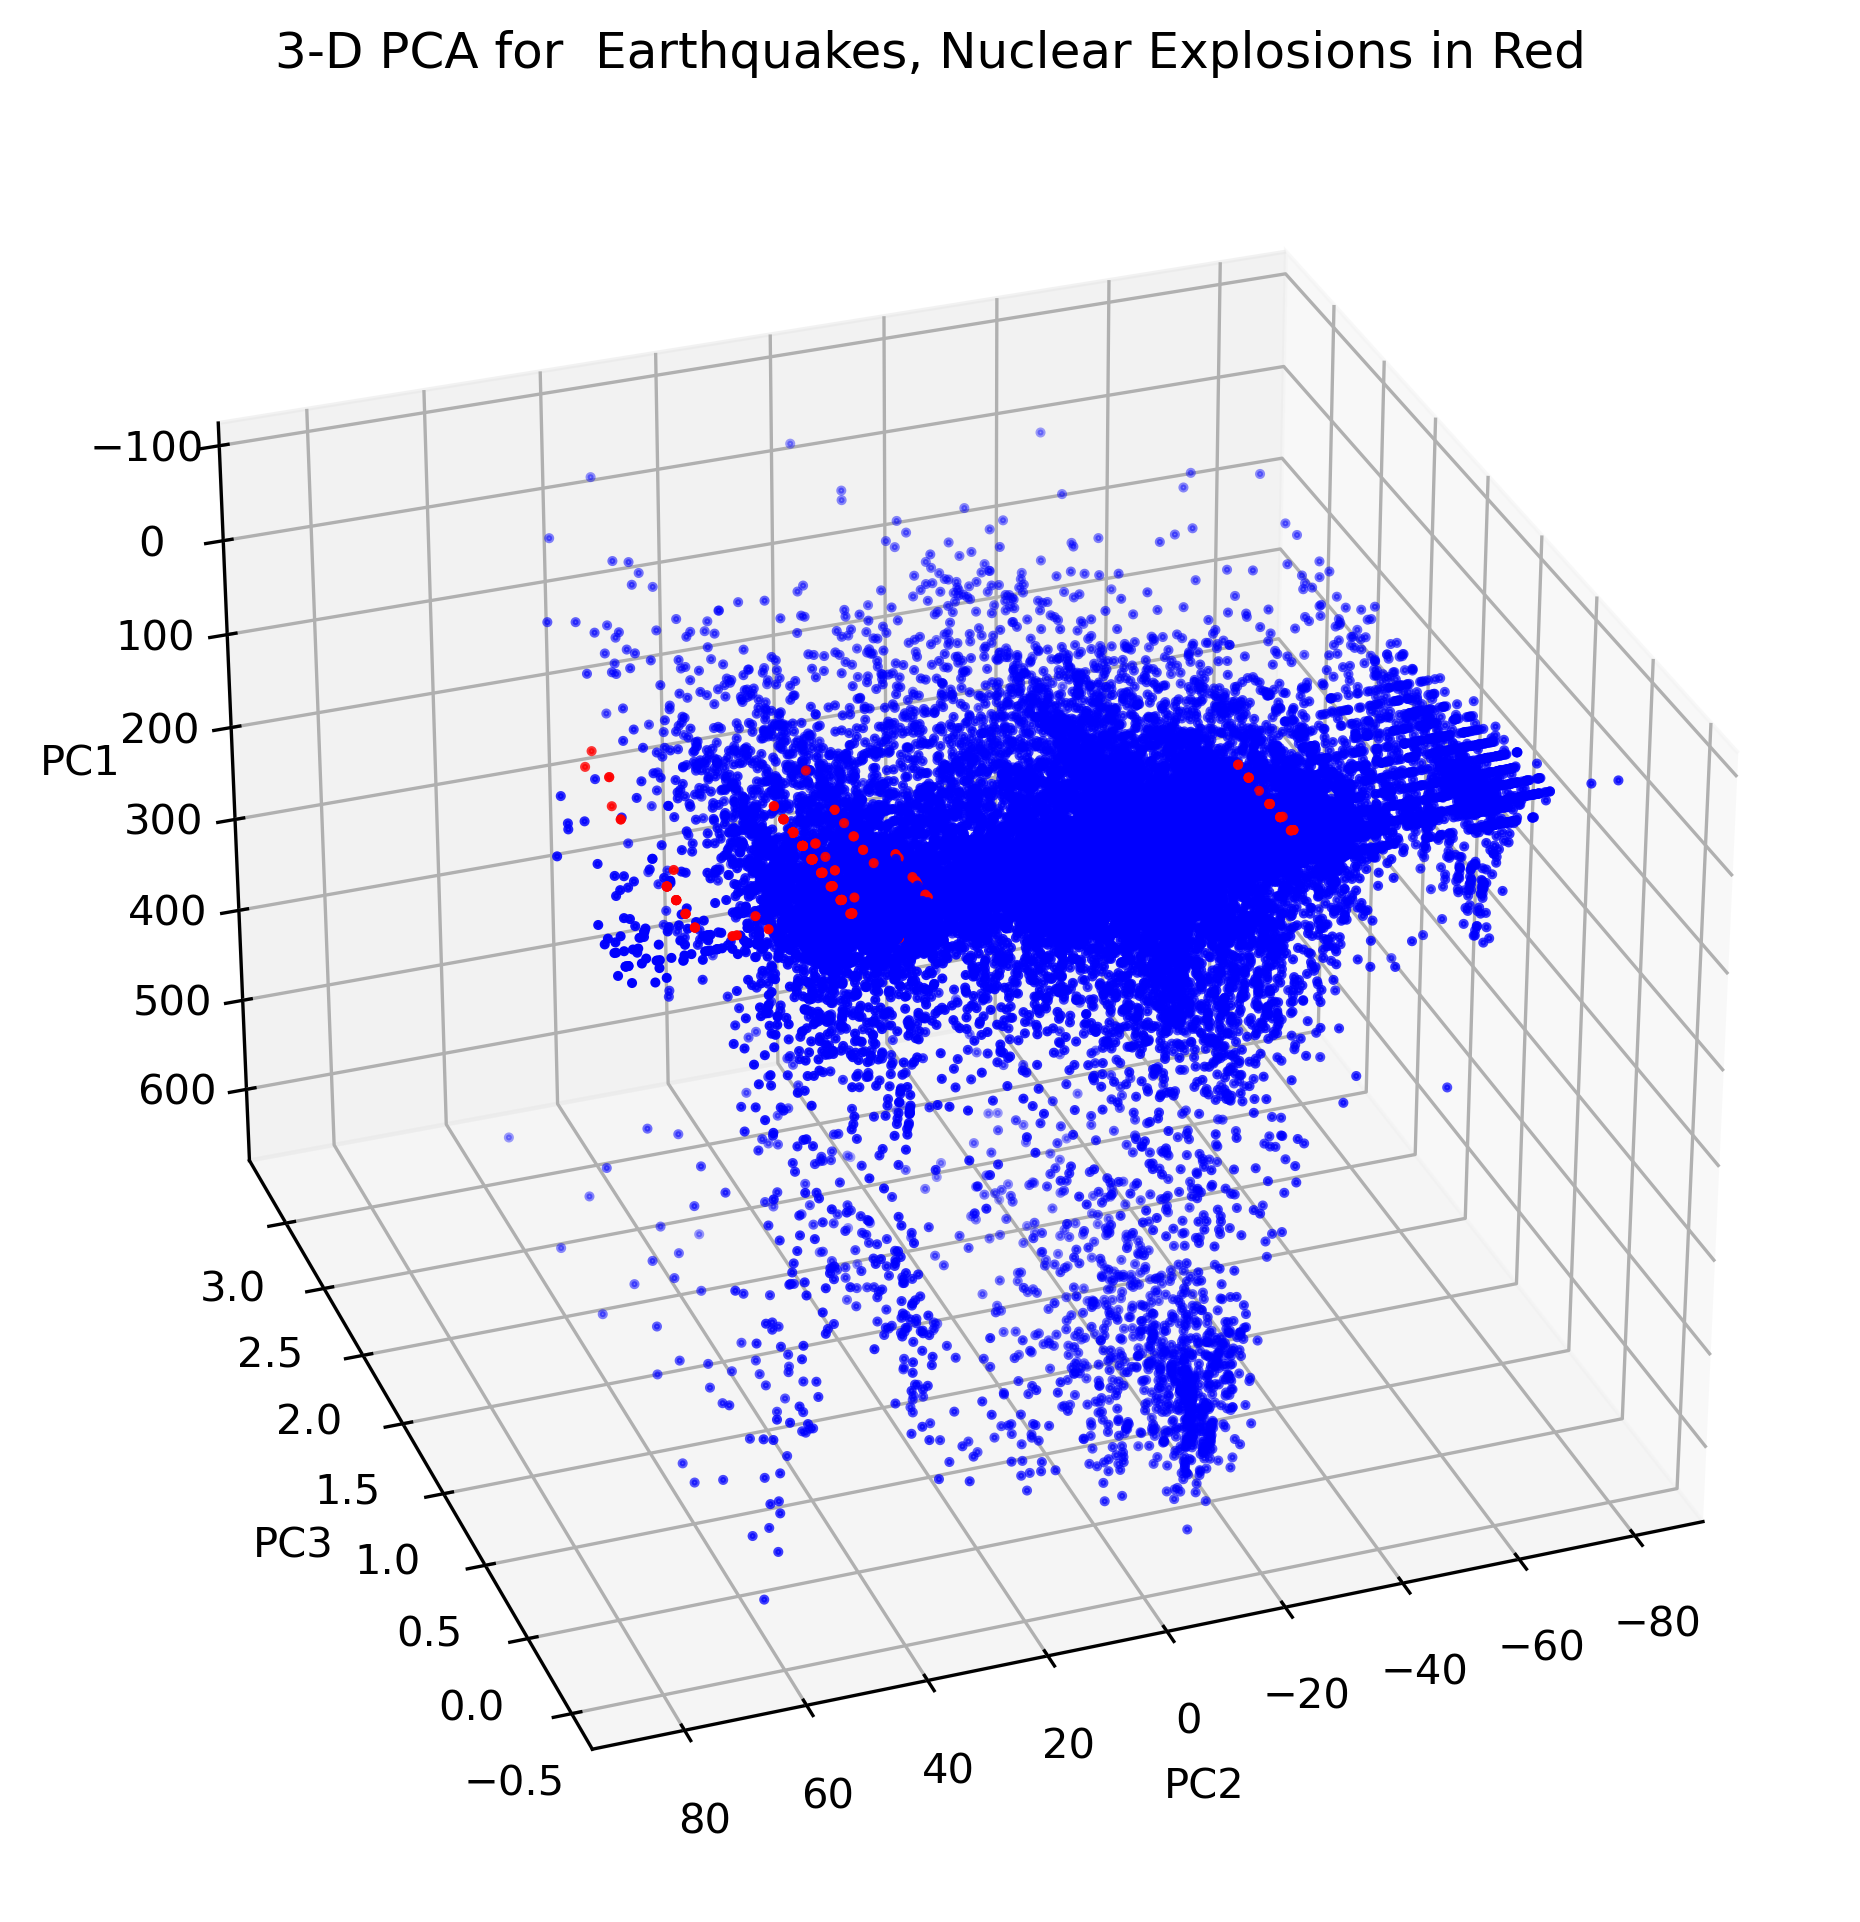

In [14]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x)
ax.scatter( X_reduced[:, 1],X_reduced[:, 2],X_reduced[:, 0], c=df.encodedType.apply(lambda x: colors[x]), s=2)
ax.set_title('3-D PCA for  Earthquakes, Nuclear Explosions in Red')
ax.set_xlabel("PC2")
ax.set_ylabel("PC3")
ax.set_zlabel("PC1")

In [15]:
zeros=np.zeros(23412)#need array of zeros as .scatter requires an argument for y value
print(zeros)

[0. 0. 0. ... 0. 0. 0.]


Text(0.5, 0, 'PC1')

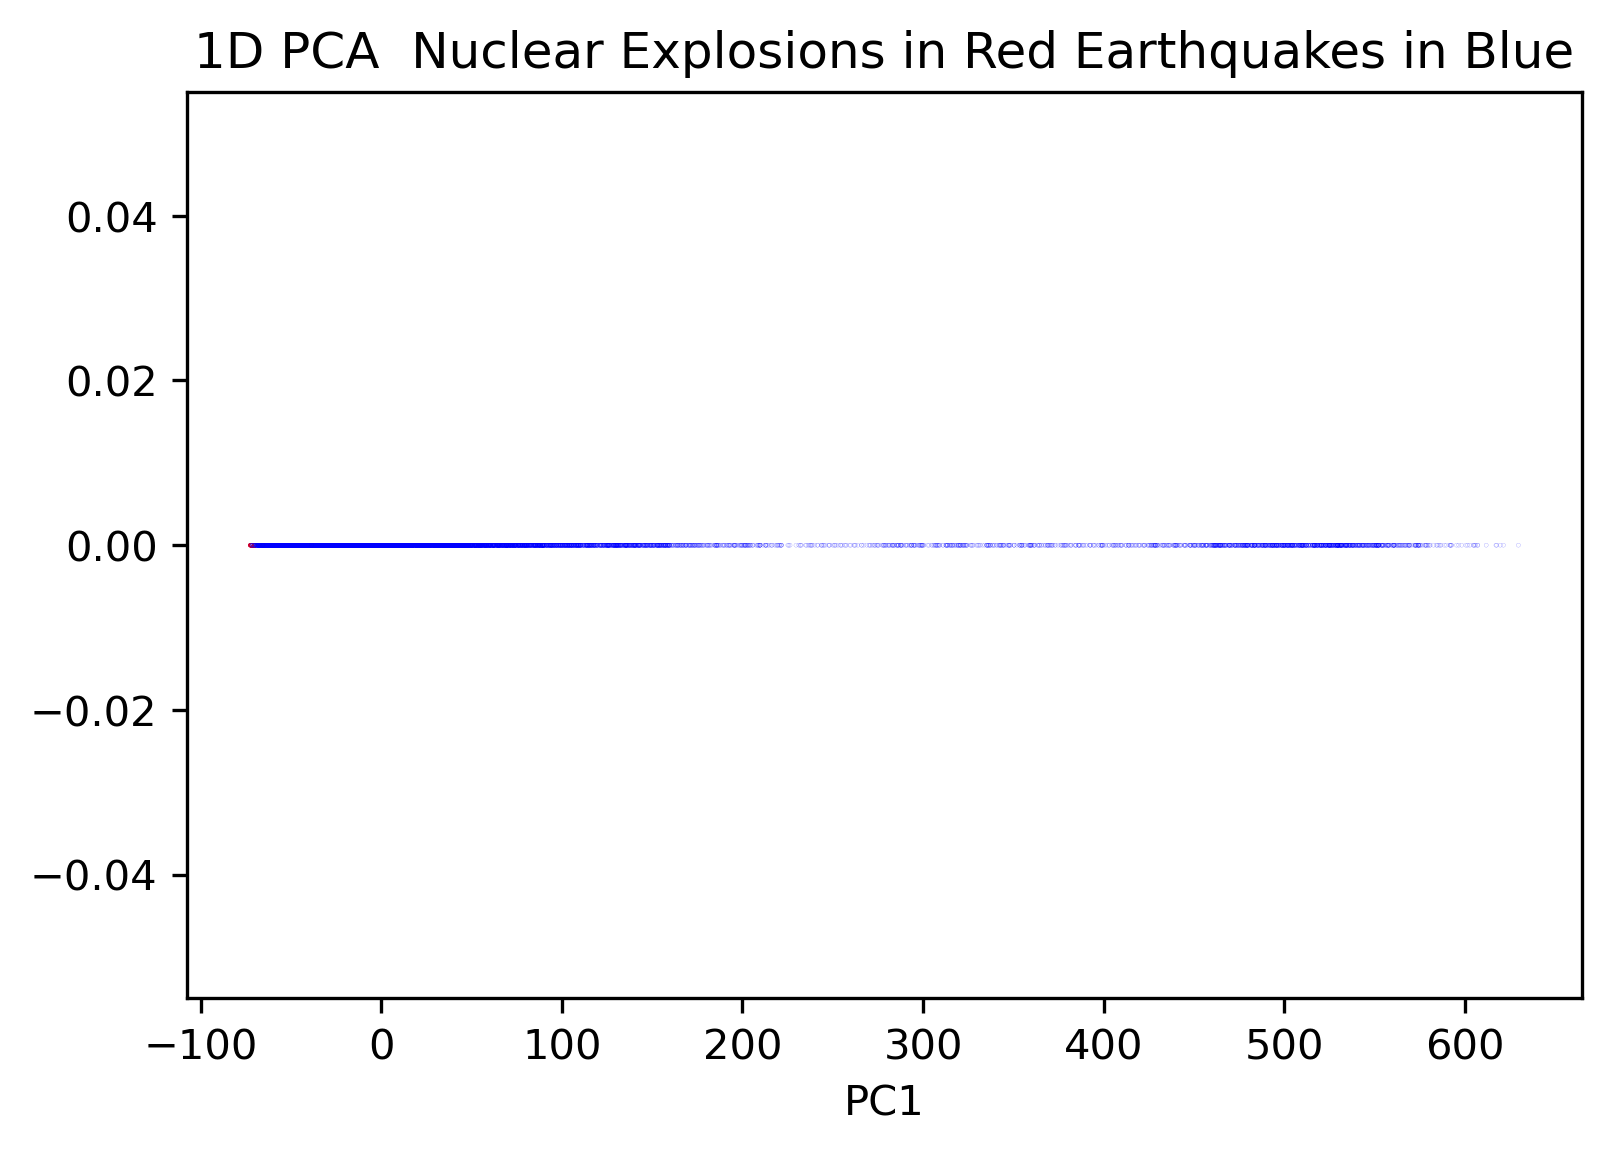

In [16]:
X_reduced = PCA(n_components=1).fit_transform(x)
plt.scatter(X_reduced[:, 0],zeros, c=df.encodedType.apply(lambda x: colors[x]), s=0.001)
plt.title("1D PCA  Nuclear Explosions in Red Earthquakes in Blue")
plt.xlabel("PC1")


In [17]:
scree=PCA(n_components=3).fit_transform(x)

https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis basis for code for this dcree plot/

In [18]:
scree=PCA(n_components=3).fit_transform(x)

In [19]:
>>> scree = PCA(n_components=3)
>>> scree.fit_transform(x)

array([[ 6.04468834e+01,  1.88499038e+01,  1.02750026e-01],
       [ 9.22612479e+00,  3.79173009e-01, -8.34695404e-02],
       [-5.02856906e+01, -2.33267999e+01,  3.33717244e-01],
       ...,
       [-6.14997374e+01,  3.39455352e+01,  4.63059752e-03],
       [ 8.45677773e+00, -1.05305801e+01,  4.22304330e-01],
       [-5.95703446e+01,  3.44656561e+01, -3.95796584e-01]])

In [20]:
print(scree.explained_variance_ratio_)

[9.43534503e-01 5.64542971e-02 1.11997230e-05]


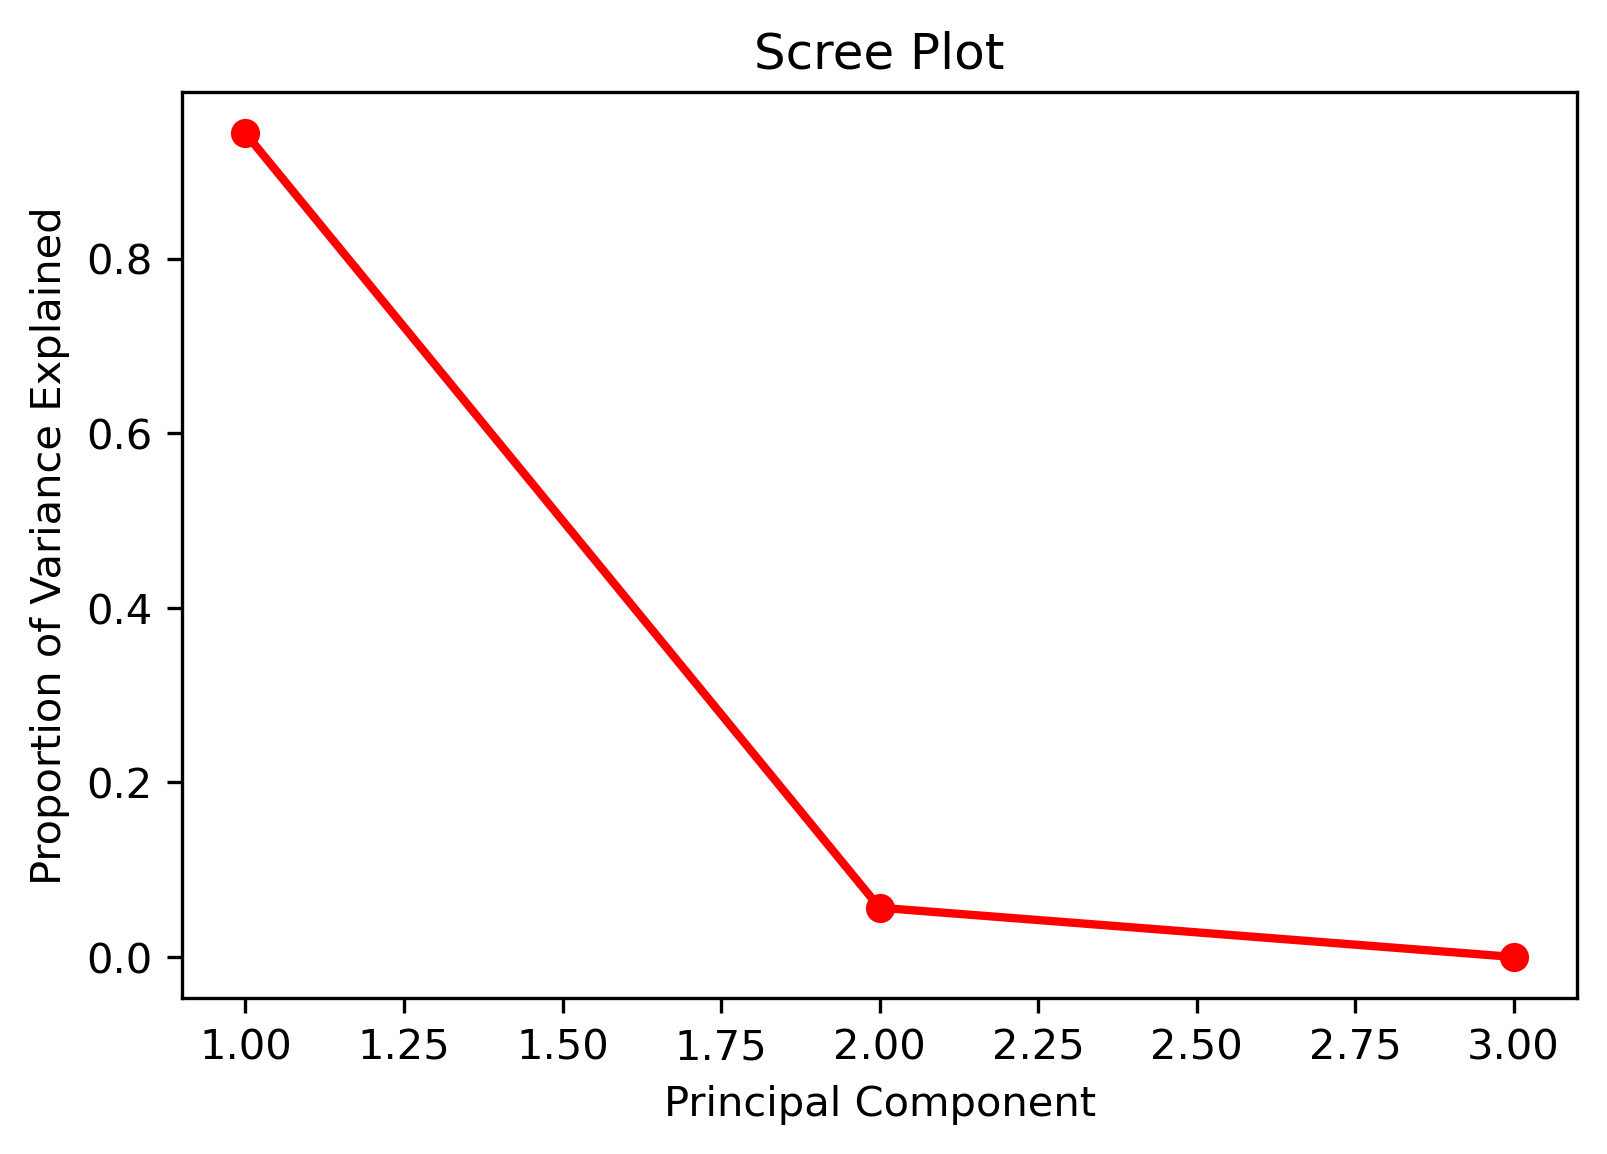

In [21]:
pca=PCA(n_components=3)
PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, scree.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()